# RRT 3D display

This script reads the data saved by the MSL app.

First the data is converted to tex.
TODO: The root does not have a control so a program that adds a zero control is needed

Then the tex file is readed and the tree is draw in 2D and 3D

In [64]:
# Read the data

file_name = '/home/irving/projects/ViewPlanning/nbvmotionplanner/build/graphsRDyn40k'
vertices_file = file_name + '_array'

file_in = open(file_name, 'r') 
file_out = open(vertices_file, 'w') 

lines = file_in.readlines()
file_in.close()

l = 0;
#init_state = []
for line in lines: 
    #if (l==0):
    #    #for word in line.strip():
    #    lenght = line
    #    #print(lenght)
    if (l==1):
        init_state = line
        # pendiente
        # file_out.write(line - '\n' + '4 0 0 0 0')
        file_out.write(line)
    if (l>1):
        file_out.write(line)
    l+=1
    
file_out.close()

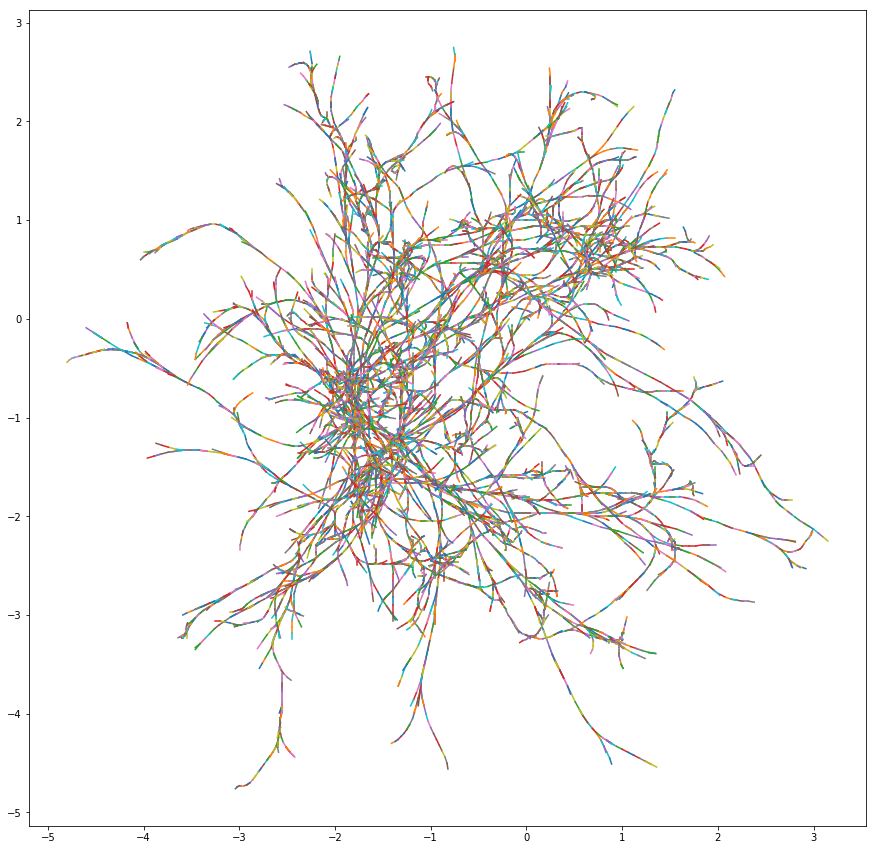

In [67]:
# Draw X-Y

import numpy as np
import matplotlib.pyplot as plt

max_plot = 20000

vertices = np.loadtxt(vertices_file)

Idx_Prev = vertices[:,1]
Idx_Prev = Idx_Prev.astype(int)
X = vertices[:,3]
Y = vertices[:,4]
Z = vertices[:,5]

#plt.figure(figsize=(15,15))
#plt.scatter(X,Y,marker='.', s = 1.0)
#plt.show()
#plt.scatter(X,Z)
#plt.show()

plt.figure(figsize=(15,15))
i = 0
for idx_prev, x, y in zip(Idx_Prev, X, Y):
    if(i < max_plot):
        if(idx_prev >= 0):
            x0 = vertices[idx_prev][3]
            y0 = vertices[idx_prev][4]
            plt.plot([x0, x], [y0, y])     
            #plt.plot([x0, x], [y0, y], c = 'k')     
    i = i + 1
plt.show()

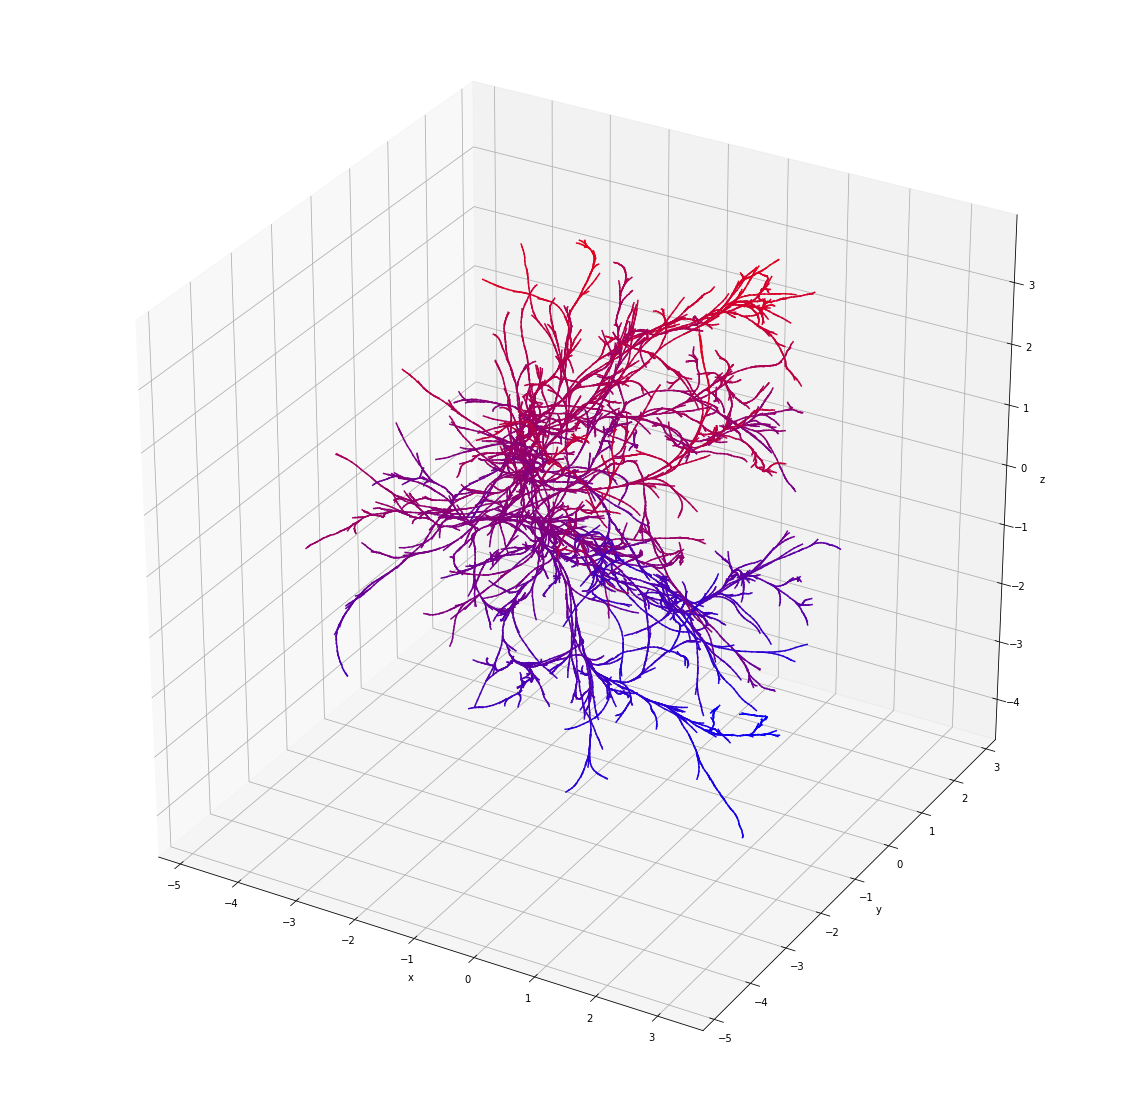

In [68]:
# Draw 3D

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
#ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


max_z = np.amax(Z)
max_z = max([np.amax(Z), np.abs(np.amin(Z))])

i = 0
for idx_prev, x, y, z in zip(Idx_Prev, X, Y, Z):
    if(i < max_plot):
        if(idx_prev >= 0):
            x0 = vertices[idx_prev][3]
            y0 = vertices[idx_prev][4]
            z0 = vertices[idx_prev][5]
            if(max_z ==0):
                red = 0
            else:
                red = (z + max_z)/(2*max_z)
            ax.plot3D([x0, x], [y0, y], [z0, z], c = [red, 0, 1-red])
    i = i+1
plt.show()
